# Plot dos Dados

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

dados_1 = np.loadtxt('dados_01.dat')
dados_2 = np.loadtxt('dados_02.dat')

x = dados_1[:, 0] # x do gráfico
u = dados_1[:,1] # Não entendi esse essa parte...
y = dados_1[:,2] # dados para fazer a função de treinamento

plt.figure(figsize=(14,4))
plt.plot(x, u, 'r')
plt.plot(x, y)
plt.show()

 # Treinamento com y(x)

500
500
270
500


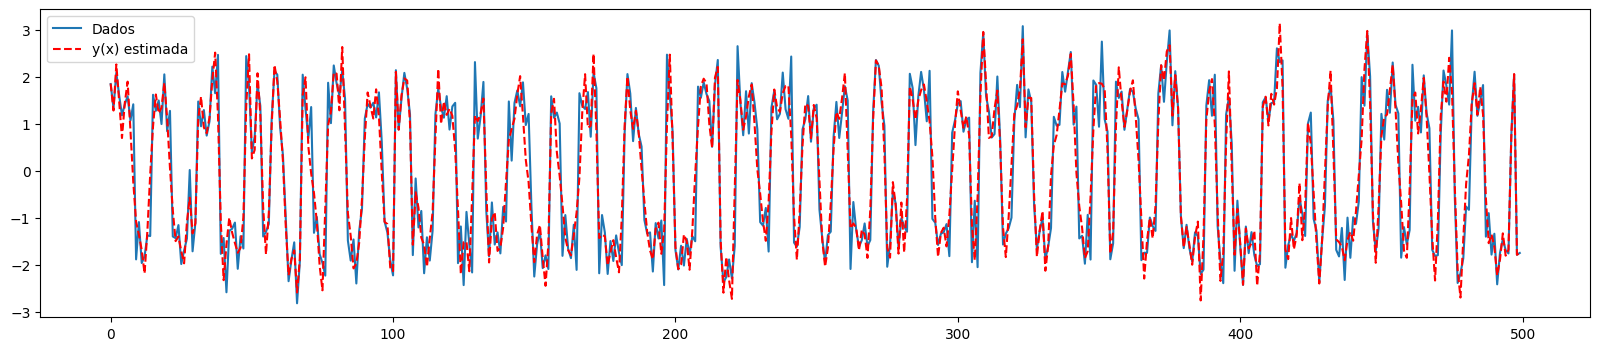

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

dados_1 = np.loadtxt('dados_01.dat')

x = dados_1[:, 0] # x do gráfico
y = dados_1[:,2] # dados para fazer a função de treinamento
#c = np.linspace(x[0], x[-1], 100) # centros
c = np.array([-1,0,2,5.5,5.7,9.5,12,16,19,23,25,26,30,31,33,35,37,40,43,45,47,49,50,52,55,57,58,59,60,63,64,65,67,68,73,75,77,80,81,82,83,86,87,88,
             91,92,93,94,98,99,100,101,102,103,104,106,107,108,109,111,112,115,116,117,118,119,120,123,124,125,127,129,131,132,134,135,137,139,
             141,143,145,150,153,155,156,160,161,163,165,168,170,171,173,176,178,180,183,185,186,190,192,195,196,198,200,202,205,209,211,214,215,216,218,
             220,222,225,227,230,232,235,237,238,240,243,245,247,248,249,252.5,254,256,257,260,262,265,268,271,273,275.8,276,278,279,280,281,283,284,286,
             288,290,293,296,300,301,302,304,305,306,309,312,314,316,317,321,322,323,324,325,328,329,330,331,334,336,337,338,339,340,343,345,346,349,
             351,353,354,357,360,362,365,366,367,369,370,372,375,376,377,379,380,381,382,384,385,386,388,389,390,393.2,395,396,398,399,401,402,403,
             406,407,408,410,411,414,415,416,419,420,421,422,424,426,427,428,432,434,436,437,438,440,444,445,448,450,451,452,454,458,459,461.9,462,463,
             465,469,472,473,474,477,478,483,484,485,488,489,490,491,492,492.5,493,495,496,498,499,500])

phi = np.zeros(shape=(len(x), len(c)))

sigma = 1

for i in range(len(x)):
    for j in range(len(c)):
        phi[i, j] = np.exp(-(1/(2*(sigma**2)))*(x[i] - c[j])**2)

w = la.pinv(phi)@y

#y_est = w[0]*phi[:,0] + w[1]*phi[:,1] + w[2]*phi[:,2]
y_est = phi @ w

# EMQ = np.mean((y - y_est)**2)
# print(f"Erro médio estimado: {EMQ:.4f}")

plt.figure(figsize=(20,4))
plt.plot(x, y, label="Dados")
plt.plot(x, y_est, '--r', label="y(x) estimada")
#plt.xticks(np.arange(0,500,step=5))
plt.legend()
plt.show()

* Qualidade e erro de treinamento

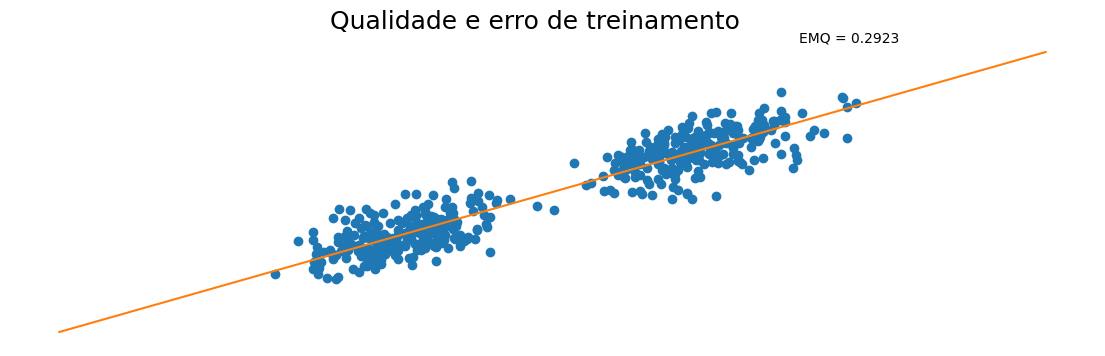

In [257]:
p = np.poly1d( np.polyfit(y, y_est, 1) )
t = np.linspace(-5, 5, 500)
#
EMQ = np.mean((y - y_est)**2)
#
plt.figure(figsize = (14,4))
plt.suptitle("Qualidade e erro de treinamento", fontsize=18, y=0.95)
plt.plot(y, y_est, 'o', t, p(t), '-')
plt.text(2.5, 4.7, 'EMQ = %.4f' %EMQ)
plt.axis('off')
plt.show()

# Etapa de teste com 'dados_02.dat'

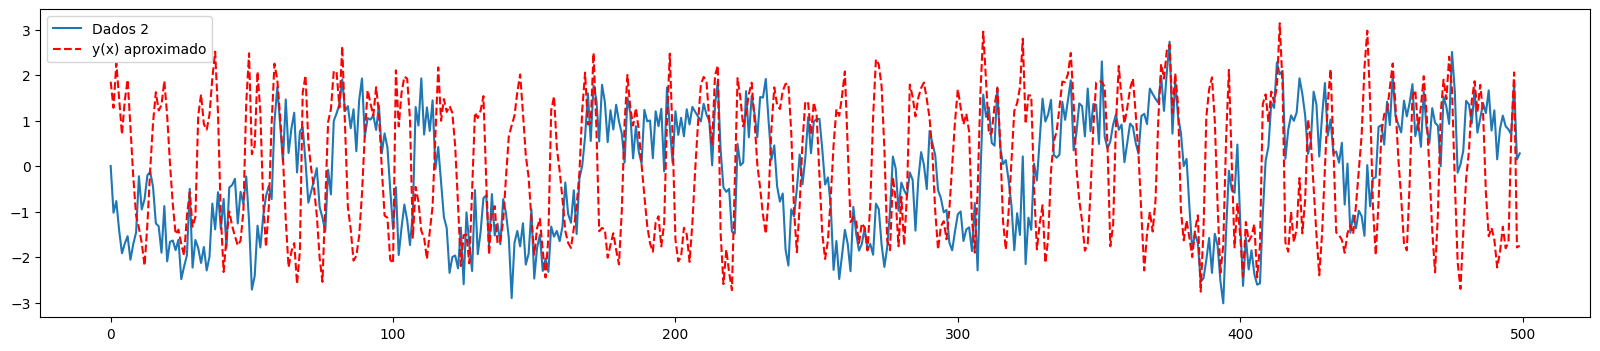

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

dados_1 = np.loadtxt('dados_01.dat')
dados_2 = np.loadtxt('dados_02.dat')

x_test = dados_2[:, 0] # x do gráfico
y_test = dados_2[:,2] # dados para testar
c_test = np.array([-1,0,2,5.5,5.7,9.5,12,16,19,23,25,26,30,31,33,35,37,40,43,45,47,49,50,52,55,57,58,59,60,63,64,65,67,68,73,75,77,80,81,82,83,86,87,88,
             91,92,93,94,98,99,100,101,102,103,104,106,107,108,109,111,112,115,116,117,118,119,120,123,124,125,127,129,131,132,134,135,137,139,
             141,143,145,150,153,155,156,160,161,163,165,168,170,171,173,176,178,180,183,185,186,190,192,195,196,198,200,202,205,209,211,214,215,216,218,
             220,222,225,227,230,232,235,237,238,240,243,245,247,248,249,252.5,254,256,257,260,262,265,268,271,273,275.8,276,278,279,280,281,283,284,286,
             288,290,293,296,300,301,302,304,305,306,309,312,314,316,317,321,322,323,324,325,328,329,330,331,334,336,337,338,339,340,343,345,346,349,
             351,353,354,357,360,362,365,366,367,369,370,372,375,376,377,379,380,381,382,384,385,386,388,389,390,393.2,395,396,398,399,401,402,403,
             406,407,408,410,411,414,415,416,419,420,421,422,424,426,427,428,432,434,436,437,438,440,444,445,448,450,451,452,454,458,459,461.9,462,463,
             465,469,472,473,474,477,478,483,484,485,488,489,490,491,492,492.5,493,495,496,498,499,500])

phi_test = np.zeros(shape=(len(x_test), len(c_test)))

sigma_test = 1

for i in range(len(x_test)):
    for j in range(len(c_test)):
        phi_test[i, j] = np.exp(-(1/(2*(sigma_test**2)))*(x_test[i] - c_test[j])**2)

y_est_test = phi_test @ w

plt.figure(figsize=(20,4))
plt.plot(x_test, y_test, label="Dados 2")
plt.plot(x_test, y_est_test, '--r', label="y(x) aproximado")
plt.legend()
plt.show()

* Qualidade e erro de validação

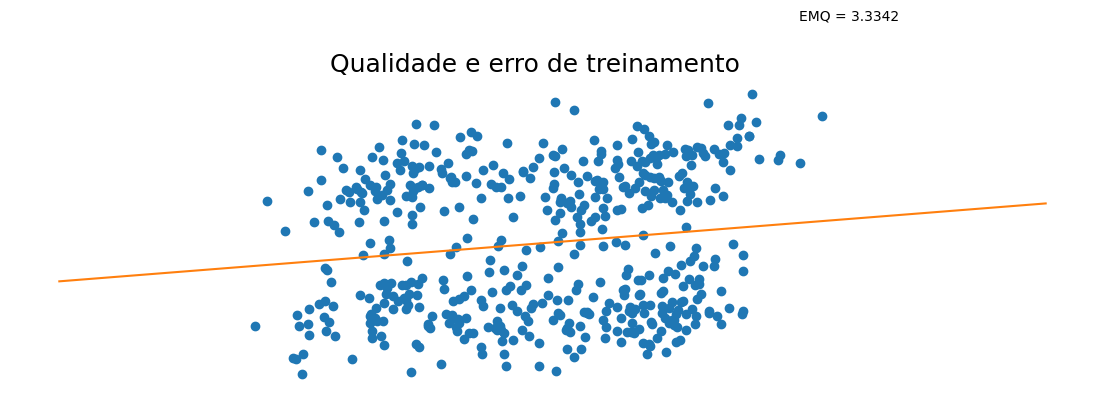

In [20]:
p = np.poly1d( np.polyfit(y_test, y_est_test, 1) )
t = np.linspace(-5, 5, 500)
#
EMQ = np.mean((y_test - y_est_test)**2)
#
plt.figure(figsize = (14,4))
plt.suptitle("Qualidade e erro de treinamento", fontsize=18, y=0.95)
plt.plot(y_test, y_est_test, 'o', t, p(t), '-')
plt.text(2.5, 4.7, 'EMQ = %.4f' %EMQ)
plt.axis('off')
plt.show()

Erro médio na validação: 0.1921


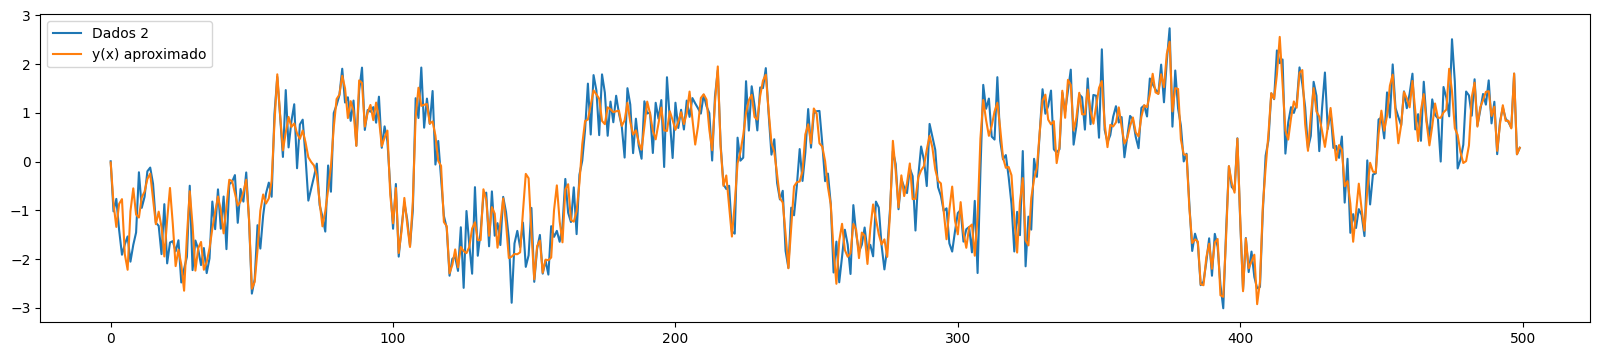

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

dados_2 = np.loadtxt('dados_02.dat')

x_test = dados_2[:, 0] # x do gráfico
y_test = dados_2[:,2] # dados para testar
c_test = np.array([-1,0,2,5.5,5.7,9.5,12,16,19,23,25,26,30,31,33,35,37,40,43,45,47,49,50,52,55,57,58,59,60,63,64,65,67,68,73,75,77,80,81,82,83,86,87,88,
             91,92,93,94,98,99,100,101,102,103,104,106,107,108,109,111,112,115,116,117,118,119,120,123,124,125,127,129,131,132,134,135,137,139,
             141,143,145,150,153,155,156,160,161,163,165,168,170,171,173,176,178,180,183,185,186,190,192,195,196,198,200,202,205,209,211,214,215,216,218,
             220,222,225,227,230,232,235,237,238,240,243,245,247,248,249,252.5,254,256,257,260,262,265,268,271,273,275.8,276,278,279,280,281,283,284,286,
             288,290,293,296,300,301,302,304,305,306,309,312,314,316,317,321,322,323,324,325,328,329,330,331,334,336,337,338,339,340,343,345,346,349,
             351,353,354,357,360,362,365,366,367,369,370,372,375,376,377,379,380,381,382,384,385,386,388,389,390,393.2,395,396,398,399,401,402,403,
             406,407,408,410,411,414,415,416,419,420,421,422,424,426,427,428,432,434,436,437,438,440,444,445,448,450,451,452,454,458,459,461.9,462,463,
             465,469,472,473,474,477,478,483,484,485,488,489,490,491,492,492.5,493,495,496,498,499,500])

phi_test = np.zeros(shape=(len(x_test), len(c_test)))

sigma_test = 1

for i in range(len(x_test)):
    for j in range(len(c_test)):
        phi_test[i, j] = np.exp(-(1/(2*(sigma_test**2)))*(x_test[i] - c_test[j])**2)

w_test = la.pinv(phi)@y_test
y_est_test = phi_test @ w_test

plt.figure(figsize=(20,4))
plt.plot(x_test, y_test, label="Dados 2")
plt.plot(x_test, y_est_test, label="y(x) aproximado")
plt.legend()
plt.show()


* Qualidade e erro de treinamento

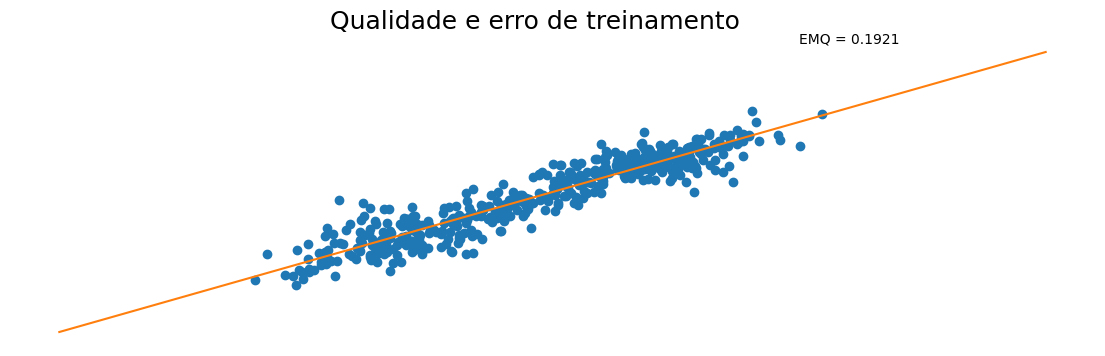

In [22]:
p = np.poly1d( np.polyfit(y_test, y_est_test, 1) )
t = np.linspace(-5, 5, 500)
#
EMQ = np.mean((y_test - y_est_test)**2)
#
plt.figure(figsize = (14,4))
plt.suptitle("Qualidade e erro de treinamento", fontsize=18, y=0.95)
plt.plot(y_test, y_est_test, 'o', t, p(t), '-')
plt.text(2.5, 4.7, 'EMQ = %.4f' %EMQ)
plt.axis('off')
plt.show()